In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [9]:
###Importing our data###
main_img = cv2.imread('../images/cross_correlation/main.jpg',0)
main_img2 =main_img.copy() # This image is used as a back up and clean picture.
foreign = cv2.imread('../images/cross_correlation/foreign_13.jpg',0)
own = cv2.imread('../images/cross_correlation/own_13.jpg',0)


In [11]:


###Setting up our data###
#set our rotation
w, h = own.shape[::-1]
M2 = cv2.getRotationMatrix2D((w/2,h/2), 2, 1) #2,5,10
M5 = cv2.getRotationMatrix2D((w/2,h/2), 5, 1)
M10 = cv2.getRotationMatrix2D((w/2,h/2), 10, 1)
Mlimit = cv2.getRotationMatrix2D((w/2,h/2), 27, 1)
#rotate image
own_rot2 = cv2.warpAffine(own, M2, (w, h))
own_rot5 = cv2.warpAffine(own, M5, (w, h))
own_rot10 = cv2.warpAffine(own, M10, (w, h))
own_rotlim = cv2.warpAffine(own, Mlimit, (w, h))

#saving pictures
cv2.imwrite('../results/cross_correlation/own_13_rot2.jpg', own_rot2) 
cv2.imwrite('../results/cross_correlation/own_13_rot5.jpg', own_rot5)
cv2.imwrite('../results/cross_correlation/own_13_rot10.jpg', own_rot10)
cv2.imwrite('../results/cross_correlation/own_13_rot27.jpg', own_rotlim)


True

In [12]:

#set our scaling
scale_percent2 = 1.02 #1.05 , 1.1 , 1.2
width = int(own.shape[1] * scale_percent2)
height = int(own.shape[0] * scale_percent2)
dim2 = (width, height)

scale_percent5 = 1.05 
width = int(own.shape[1] * scale_percent5)
height = int(own.shape[0] * scale_percent5)
dim5 = (width, height)

scale_percent10 = 1.1
width = int(own.shape[1] * scale_percent10)
height = int(own.shape[0] * scale_percent10)
dim10 = (width, height)

scale_percent20 = 1.2
width = int(own.shape[1] * scale_percent20)
height = int(own.shape[0] * scale_percent20)
dim20 = (width, height)

scale_percentlim = 1.37
width = int(own.shape[1] * scale_percentlim)
height = int(own.shape[0] * scale_percentlim)
dimlim = (width, height)

# resize image
own_res2 = cv2.resize(own, dim2, interpolation = cv2.INTER_AREA)
own_res5 = cv2.resize(own, dim5, interpolation = cv2.INTER_AREA)
own_res10 = cv2.resize(own, dim10, interpolation = cv2.INTER_AREA)
own_res20 = cv2.resize(own, dim20, interpolation = cv2.INTER_AREA)
own_reslim = cv2.resize(own, dimlim, interpolation = cv2.INTER_AREA)

#saving pictures
cv2.imwrite('../results/cross_correlation/own_13_res2.jpg', own_res2)
cv2.imwrite('../results/cross_correlation/own_13_res5.jpg', own_res5)
cv2.imwrite('../results/cross_correlation/own_13_res10.jpg', own_res10)
cv2.imwrite('../results/cross_correlation/own_13_res20.jpg', own_res20)
cv2.imwrite('../results/cross_correlation/own_13_reslim.jpg', own_reslim)



True

In [13]:
def Zoom(cv2Object, zoomSize):
    ''' Help:
    The goal of this function is to zoom our picture while keeping the original size.
    The first argument is the image we want to zoom.
    The second argument is the zoom we decide to use
    nota bene : a zoomsize equals to 1.05 means we are zooming by 5%, another one set at 1.20 means 20% etc...
    '''
    cv2object = cv2Object.copy()
    width = int(cv2object.shape[1] * zoomSize)
    height = int(cv2object.shape[0] * zoomSize)
    dim = (width, height)
    cv2object = cv2.resize(cv2object, dim, interpolation = cv2.INTER_AREA)
    center = (cv2object.shape[0]/2,cv2object.shape[1]/2)
    cropScale = (int(center[0]/zoomSize), int(center[1]/zoomSize))
    a=int((center[0] + cropScale[0]))
    b=int((center[1] + cropScale[1]))
    cv2object = cv2object[cropScale[0]:a, cropScale[1]:b]
    return cv2object
#zooming
own_scale2=Zoom(own,1.02)
own_scale5=Zoom(own,1.05)
own_scale10=Zoom(own,1.1)
own_scale20=Zoom(own,1.2)

#saving pictures
cv2.imwrite('../results/cross_correlation/own_13_scale2.jpg', own_scale2)
cv2.imwrite('../results/cross_correlation/own_13_scale5.jpg', own_scale5)
cv2.imwrite('../results/cross_correlation/own_13_scale10.jpg', own_scale10)
cv2.imwrite('../results/cross_correlation/own_13_scale20.jpg', own_scale20)




True

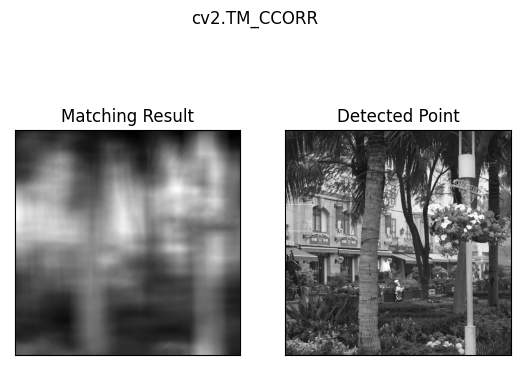

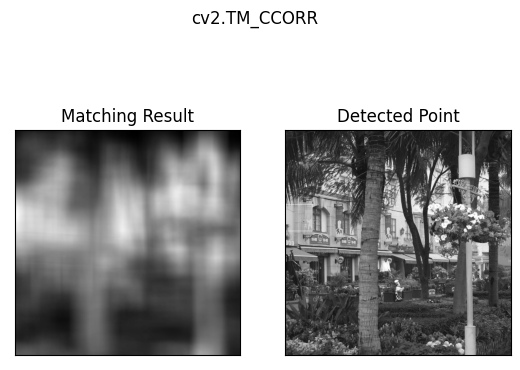

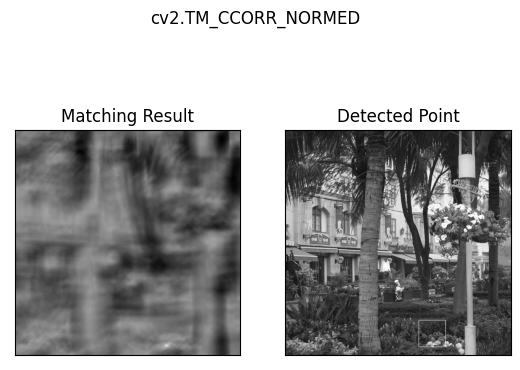

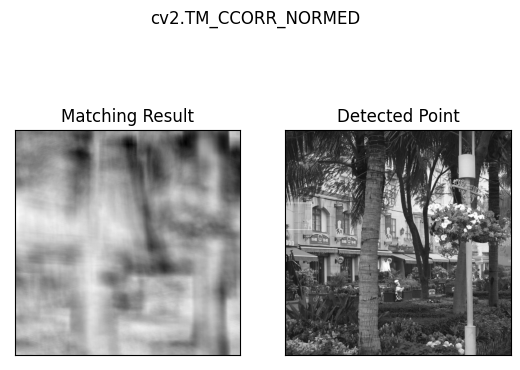

In [16]:

###Testing###

#Used to detect sample image and foreign image and to determine which method to use.        
methods = ['cv2.TM_CCORR','cv2.TM_CCORR_NORMED'] #setting methods.
sample=['own','foreign'] #choosing which picture will be used.
for meth in methods:
    for pictures in sample:
        
        main_img = main_img2.copy()
        method = eval(meth)
        picture= eval(pictures)
        
        # Apply template Matching
        res = cv2.matchTemplate(main_img,picture,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv2.rectangle(main_img,top_left, bottom_right, 255, 2)

        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(main_img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)

        plt.show()


With the previous plot we compare different cross correlation. 
Only the Normed cross correlation normed detect the sub image in the image.
On the left images we can see a white dot, which represent where the matching was made. 

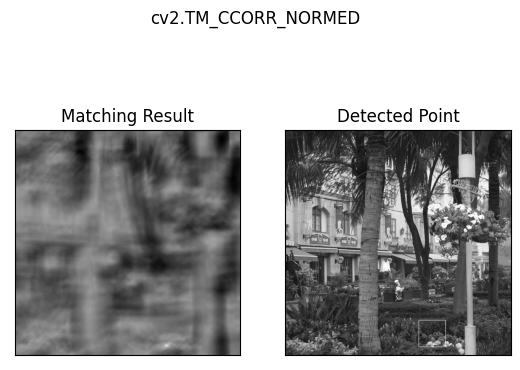

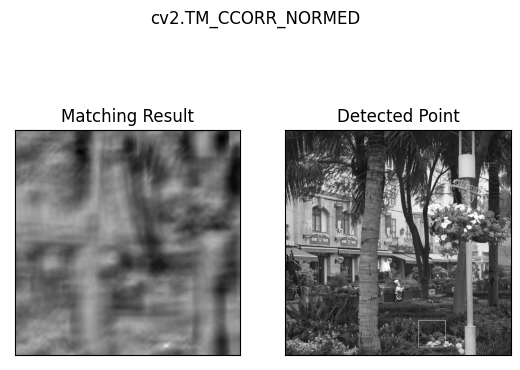

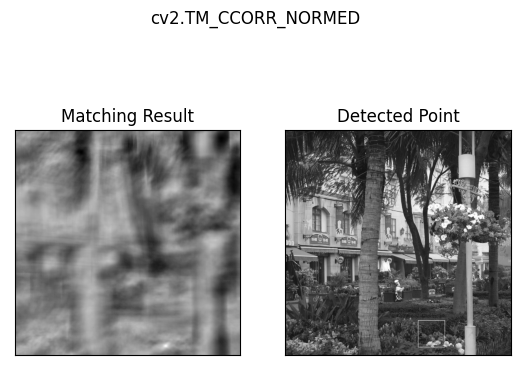

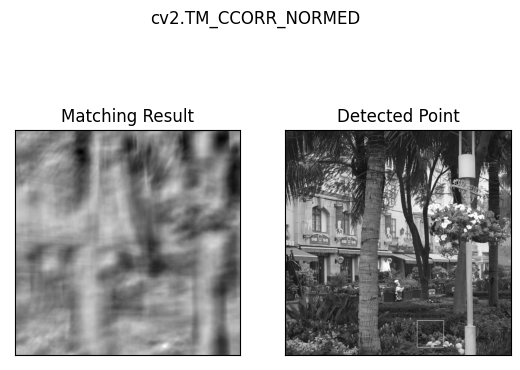

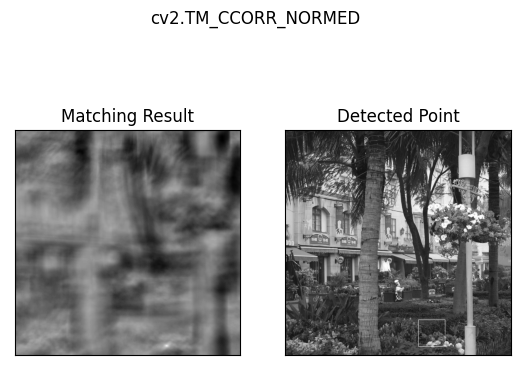

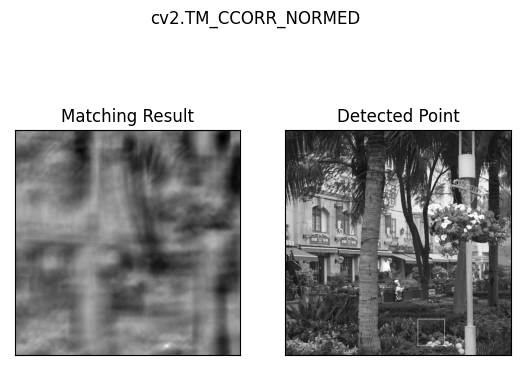

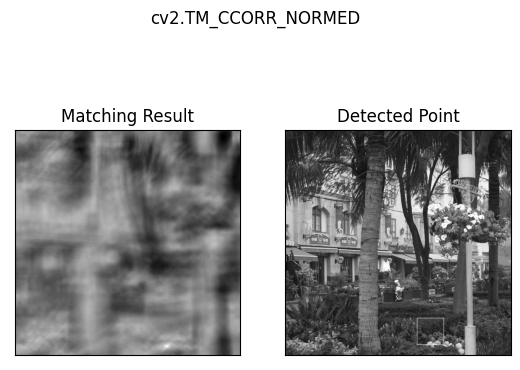

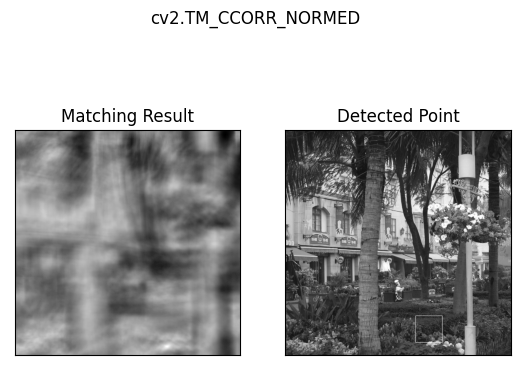

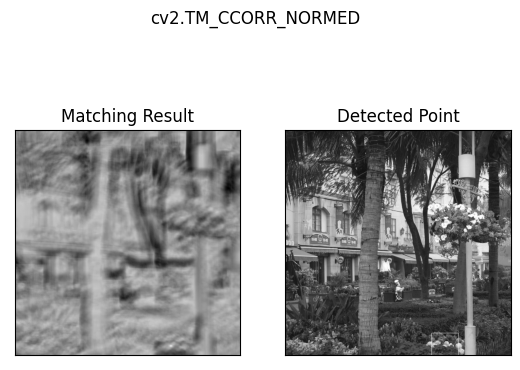

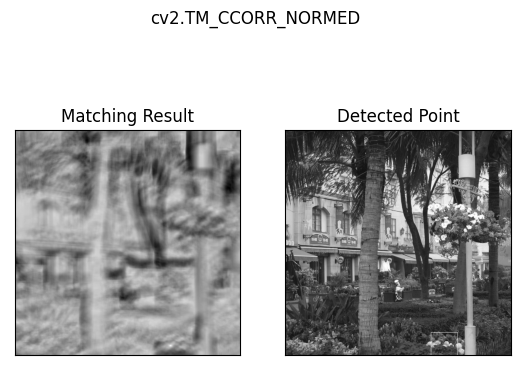

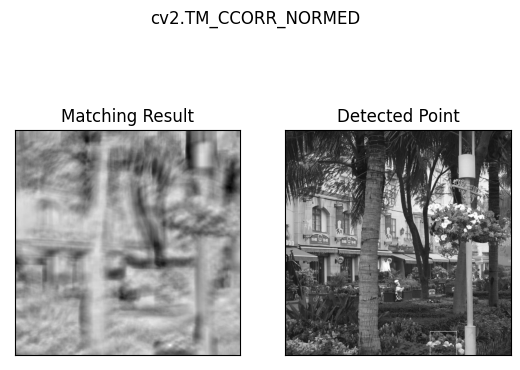

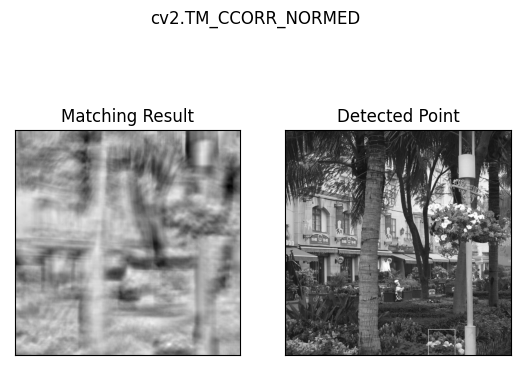

In [17]:

methods = ['cv2.TM_CCORR_NORMED'] #'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED','cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
sample=['own','own_rot2','own_rot5','own_rot10',
        'own_res2','own_res5','own_res10','own_res20',
        'own_scale2','own_scale5','own_scale10','own_scale20'] #choosing used images.

#Used to match own image with normalized data set.
for meth in methods:
    for pictures in sample:
        
        main_img = main_img2.copy()
        method = eval(meth)
        picture= eval(pictures)
        
        # Apply template Matching
        res = cv2.matchTemplate(main_img,picture,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv2.rectangle(main_img,top_left, bottom_right, 255, 2)

        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(main_img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)

        plt.show()


Cross-correlation matching is a simple and effective method as long we use normalized data and we do not use huge pictures, one of the main flaw of cross- correlation is the cost of the method. 


Cross-correlation requires to calculate every iteration on the picture to find the matching part such method becomes quite ineffective when there is a lot of pictures to analyze because it will requires too much time and computing power.